In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from dataset import LayoutDataset
from models import LayoutMLP
from scipy.stats import kendalltau

2023-11-13 20:40:39.708299: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-13 20:40:40.289548: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 128
dataset_take = 1000
learning_rate = 1.5e-3
batch_per_file_size = 8
node_embedding_size = 15
layers = [128, 64, 32, 36, 24]

dataset = LayoutDataset(
    batch_size, dataset_take,
    build_tfrecords=False,
    batch_per_file_size=batch_per_file_size
)

2023-11-13 20:40:42.664777: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-13 20:40:42.784623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-13 20:40:42.784868: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

train layout:nlp:default 1000
train layout:nlp:random 1000
train layout:xla:random 3000
train layout:xla:default 3000
test all_filenames 10000
valid all_filenames 1000


In [3]:
mlp = LayoutMLP(
    batch_size,
    learning_rate=learning_rate,
    batch_per_file_size=batch_per_file_size,
    node_embedding_size=node_embedding_size,
    validation_frequency=10_000,
    validations_without_improvement=5,
    layer_sizes=layers,
    loss='pairwise_hinge',
    n_siblings=dataset.n_siblings,
    l1_multiplier=2e-8,
    output_name='layout_11_13_20_40'
)

In [4]:
mlp.train(dataset, None)

2023-11-13 20:43:18.938619: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-13 20:43:18.963623: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2c696360a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-13 20:43:18.963654: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-13 20:43:18.980396: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-13 20:43:19.193291: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-13 20:43:19.320537: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

iteration 500 training loss 3.3600264 lr 0.00007
iteration 1000 training loss 2.4732778 lr 0.00015
iteration 1500 training loss 2.5409043 lr 0.00022
iteration 2000 training loss 2.5959814 lr 0.00030
iteration 2500 training loss 2.3290887 lr 0.00037
iteration 3000 training loss 2.3746898 lr 0.00045
iteration 3500 training loss 2.130433 lr 0.00052
iteration 4000 training loss 1.6229335 lr 0.00060
iteration 4500 training loss 1.9404889 lr 0.00067
iteration 5000 training loss 2.2088802 lr 0.00075
iteration 5500 training loss 2.138054 lr 0.00082
iteration 6000 training loss 1.9162823 lr 0.00090
iteration 6500 training loss 2.1704886 lr 0.00097
iteration 7000 training loss 1.5089248 lr 0.00105
iteration 7500 training loss 2.1581185 lr 0.00112
iteration 8000 training loss 1.5737956 lr 0.00120
iteration 8500 training loss 1.7301414 lr 0.00127
iteration 9000 training loss 1.2449287 lr 0.00135
iteration 9500 training loss 1.2586869 lr 0.00142
iteration 10000 training loss 1.8036917 lr 0.00150
la

iteration 70000 training loss 1.0430722 lr 0.00131
layout:nlp:random 0.9111614313806253
layout:nlp:default 0.4819392558855517
layout:xla:random 0.5743006203386114
layout:xla:default 0.3018560143178278
epoch 0, it 70000 validation loss -0.567
iteration 70500 training loss 1.110426 lr 0.00130
iteration 71000 training loss 1.1673363 lr 0.00130
iteration 71500 training loss 1.2554368 lr 0.00130
iteration 72000 training loss 0.85676736 lr 0.00129
iteration 72500 training loss 1.0054806 lr 0.00129
iteration 73000 training loss 0.7582352 lr 0.00129
iteration 73500 training loss 0.9018563 lr 0.00128
iteration 74000 training loss 1.0925695 lr 0.00128
iteration 74500 training loss 0.713786 lr 0.00128
iteration 75000 training loss 1.2179419 lr 0.00128
iteration 75500 training loss 1.0507576 lr 0.00127
iteration 76000 training loss 1.0556474 lr 0.00127
iteration 76500 training loss 1.1867027 lr 0.00127
iteration 77000 training loss 1.6965548 lr 0.00126
iteration 77500 training loss 1.0004407 lr 0.

KeyboardInterrupt: 

In [5]:
mlp.best_val_subsets

{'layout:nlp:random': 0.9158816485099424,
 'layout:nlp:default': 0.48417828887049597,
 'layout:xla:random': 0.6316193464120733,
 'layout:xla:default': 0.34035753598690877}

In [6]:
np.mean(list(mlp.best_val_subsets.values()))

0.5930092049448551

## Evaluate validation set

In [ ]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

In [ ]:
plt.subplot(2, 1, 1)
plt.hist(val_df['target'], bins=50)
plt.subplot(2, 1, 2)
plt.hist(val_df['prediction'], bins=50);

In [ ]:
val_df.groupby('ID').apply(lambda x: x.min()).sort_values('prediction')

In [ ]:
x_lin = np.linspace(15, 25, 100)
#plt.plot(x_lin, x_lin, color='orange')

random_sample = val_df.sample(1_000)
graph_id = np.random.choice(val_df['ID'].unique())
#graph_id = b'layout:xla:default:inception_v3_batch_128_train'
#graph_id = b'layout:xla:default:unet_3d.4x4.bf16'
random_sample = val_df[val_df['ID'] == graph_id].copy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample.target,
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

random_sample.sort_values('target', inplace=True)
plt.subplot(1, 2, 2)
plt.scatter(
    np.arange(len(random_sample)),
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

In [ ]:
mlp.dense_layer_node_3.kernel.numpy().shape

In [ ]:
plt.hist(mlp.dense_layer_global_3.kernel.numpy().flatten(), bins=100);

In [ ]:
plt.hist(mlp.dense_layer_global_1.kernel.numpy()[:, 48:72].flatten(), bins=100);

In [ ]:
(np.abs(mlp.dense_layer_global_1.kernel.numpy().flatten())>1.5).mean()

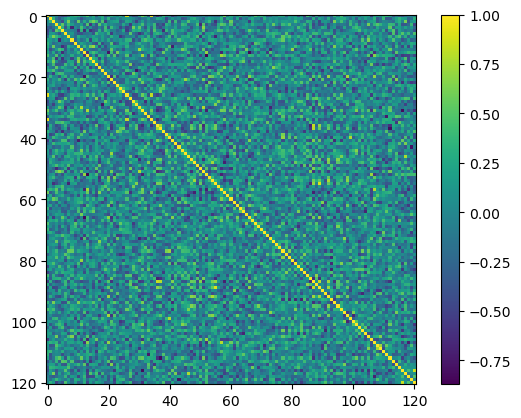

In [7]:
emb = mlp.embedding_layer_node_ops.weights[0].numpy()
emb = emb / np.expand_dims(np.linalg.norm(emb, axis=1), axis=-1)
dots = np.matmul(emb, emb.T)
plt.imshow(dots)
plt.colorbar()

In [ ]:
ind = np.unravel_index(np.argsort(dots.flatten())[-122], dots.shape)
ind

In [ ]:
val_df[val_df['ID'] == b'layout:xla:default:unet_3d.4x4.bf16'].sort_values('target')

In [ ]:
for val_batch in dataset.valid_data:
    if b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy():
        print(val_batch['layout_id'])
        break

In [ ]:
np.unique(val_batch['layout_id'].numpy())

In [ ]:
b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy()

In [ ]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 0.7, 100)
#plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [ ]:
def sort_configs(df):
    top = df.sort_values('prediction')
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

In [ ]:
val_prediction = val_df.groupby('ID').apply(sort_configs)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

In [ ]:
val_df

In [ ]:
val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3])).unique()

In [ ]:
def compute_layout_score_group(df):
    score, _ = kendalltau(df['prediction'], df['target'])
    return score

val_df['subset'] = val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
all_means = []
for subset in val_df['subset'].unique():
    mean = np.mean(val_df[val_df['subset'] == subset].groupby('ID').apply(compute_layout_score_group))
    all_means.append(mean)
    print(subset, mean)
print(np.mean(all_means))

In [ ]:
np.mean([
    0.9235,
    0.6591,
    0.516,
    0.358,
    0.968
])

In [ ]:
val_scores = val_df.groupby('ID').apply(compute_layout_score_group)
val_scores.sort_values()

In [ ]:
valid_nodes_list = []
for batch in dataset.valid_data:
    df = pd.DataFrame(
        np.stack([
            batch['layout_id'].numpy(), 
            batch['valid_nodes'].numpy()], axis=-1),
        columns=['ID', 'valid_nodes']
    ).drop_duplicates('ID')
    valid_nodes_list.append(df)
valid_nodes = pd.concat(valid_nodes_list).drop_duplicates('ID')
valid_nodes

In [ ]:
valid_nodes.set_index('ID', inplace=True)
valid_nodes['scores'] = val_scores
valid_nodes

In [ ]:
valid_nodes.reset_index(inplace=True)
valid_nodes

In [ ]:
valid_nodes['subset'] = valid_nodes['ID'].apply(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
valid_nodes

In [ ]:
plt.scatter(
    valid_nodes['scores'],
    valid_nodes['valid_nodes']
)

In [ ]:
subset = 'layout:xla:random'
valid_nodes_subset = valid_nodes[valid_nodes['subset'] == subset]
print(valid_nodes_subset.sort_values('valid_nodes').iloc[-1])
plt.scatter(
    valid_nodes_subset['scores'],
    valid_nodes_subset['valid_nodes']
)

In [ ]:
def layout_score(candidate_order, layout_dict):
    runtimes = layout_dict['config_runtime']
    best_ranking = np.argsort(runtimes)
    assert len(candidate_order) == len(runtimes)
    score, _ = kendalltau(candidate_order, best_ranking)
    return score

In [ ]:
dirpath, filename

In [ ]:
true_order = np.argsort(layout_dict['config_runtime'])
plt.scatter(true_order, candidate_order)

In [ ]:
layout_set = 'valid'
true_orders = []
layout_ids = []
for dirpath, dirnames, filenames in os.walk('predict-ai-model-runtime/npz_all/npz/layout'):
    if len(filenames) == 0:
        continue
    
    if dirpath.split('/')[-1] != layout_set:
        continue
        
    layout_id_prefix = ':'.join(dirpath.split('/')[-4:-1])
    for filename in os.listdir(dirpath):
        print(filename)
        layout_id = layout_id_prefix+':'+filename[:-4]
        layout_dict = dict(np.load(os.path.join(dirpath, filename)))
        runtimes = layout_dict['config_runtime']
        best_ranking = np.argsort(runtimes)
        best_ranking = ';'.join([str(i) for i in best_ranking])
        true_orders.append(best_ranking)
        layout_ids.append(layout_id)
        
true_order_df = pd.DataFrame(
    data=np.stack([layout_ids, true_orders], axis=-1),
    columns=['ID', 'true_order']
)
true_order_df

In [ ]:
# layout_id = true_order_df.sample()['ID'].values[0]
layout_id = 'layout:xla:default:resnet50.4x4.fp16'
true_order = [int(i) for i in true_order_df[true_order_df['ID'] == layout_id]['true_order'].values[0].split(';')]
candidate_order = [int(i) for i in val_prediction[layout_id].split(';')]

plt.scatter(true_order, candidate_order)
plt.xlabel('true order')
plt.ylabel('candidate order')
plt.title(f'{layout_id}, len {len(true_order)}')

In [ ]:
layout_dict = dict(np.load('predict-ai-model-runtime/npz_all/npz/layout/nlp/default/valid/small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train.npz'))
layout_dict['node_config_feat'].shape

In [ ]:
val_df[val_df['ID'] == b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train']

In [ ]:
evaluation_result_layout['score'].astype(float).mean()

## Inference over test set

In [ ]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

In [ ]:
test_df.groupby('ID').count()

In [ ]:
test_prediction = test_df.groupby('ID').apply(sort_configs)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

In [ ]:
test_prediction = pd.DataFrame(test_prediction, columns=['TopConfigs']).reset_index()
test_prediction

In [ ]:
test_prediction['subset'] = test_prediction['ID'].apply(lambda x:':'.join(x.split(':')[:3]))

In [ ]:
subset = 'layout:xla:default'
test_prediction[test_prediction['subset'] == subset]

In [ ]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('predictions/layout_none_test_prediction_11_11_01_21.csv')